In [1]:
import json
import re
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud
from konlpy.tag import Okt
# *Okt는 한글 품사 태깅을 위한 모듈이다!

In [3]:
inputFileName = '4.3ref/ratings_train.txt'

# file.read()
'''
- file.read()를 호출할 때마다 지정된 파일의 내용을,
- 처음부터 끝까지 읽어서 하나의 문자열로 반환
'''
with open(inputFileName, 'r', encoding='utf8') as file:
    ratings_train = file.read()
# print(ratings_train) # str타입
len(ratings_train) # 6937271

6937271

In [4]:
# rating데이터 가공..은 할 필요가 없음 -> Okt가 알아서 해줌
'''
- 난 처음에, rating1데이터를 split, replace등으로 없애려고 했는데,
- 굳이 그럴 필요가 없네 이 데이터는. Okt가 알아서 해주네 ㄷㄷ;;
'''

nlp = Okt()
rating1_N = nlp.nouns(ratings_train)
rating1_N


['더빙',
 '진짜',
 '목소리',
 '흠',
 '포스터',
 '보고',
 '초딩',
 '영화',
 '줄',
 '오버',
 '연기',
 '무재',
 '밓었',
 '다그',
 '래서',
 '추천',
 '교도소',
 '이야기',
 '구먼',
 '재미',
 '평점',
 '조정',
 '몬페',
 '의',
 '연기',
 '영화',
 '스파이더맨',
 '커스틴',
 '던스트',
 '막',
 '걸음',
 '마',
 '세',
 '초등학교',
 '학년',
 '생인',
 '영화',
 '반개',
 '움',
 '원작',
 '긴장감',
 '제대로',
 '별',
 '반개',
 '욕',
 '이응경',
 '길용우',
 '생활',
 '년',
 '정말',
 '발',
 '해도',
 '그것',
 '납치',
 '감금',
 '반복',
 '반복',
 '드라마',
 '가족',
 '연기',
 '사람',
 '네',
 '액션',
 '재미',
 '몇',
 '영화',
 '왜케',
 '평점',
 '꽤',
 '볼',
 '데',
 '헐리우드',
 '인피니트',
 '짱',
 '진짜',
 '볼때',
 '향수',
 '자극',
 '허진호',
 '감성',
 '절제',
 '멜로',
 '달인',
 '울면',
 '손',
 '횡단보도',
 '때',
 '뻔',
 '이범수',
 '연기',
 '로만',
 '자꾸',
 '그',
 '사람',
 '것',
 '취향',
 '존중',
 '다지',
 '진짜',
 '내생',
 '극장',
 '영화',
 '가장',
 '노잼',
 '노',
 '감동',
 '임',
 '스토리',
 '어거지',
 '감동',
 '어거지',
 '냥',
 '매번',
 '긴장',
 '재밋음',
 '사람',
 '바스코',
 '이기',
 '락스',
 '코',
 '바비',
 '이기',
 '아이돌',
 '그냥',
 '안달',
 '것',
 '굿바이',
 '레닌',
 '표절',
 '것',
 '이해',
 '왜',
 '뒤',
 '갈수록',
 '재미',
 '이건',
 '정말',
 '깨알',
 '캐스팅',
 '질퍽',
 '용구성',
 '버무러진',


In [10]:
# 단어별 출현 횟수 계산 & 상위 80개 걸러내기
count = Counter(rating1_N)
count.most_common(80)

# most_common을 해보면 영화가 압도적 1위인데, 영화평점이니 당연한 것 -> 이건 빼는게 나을듯
word_count = dict()
for tag, counts in count.most_common(80):
    if len(str(tag)) > 1 and str(tag) != '영화':
        word_count[tag] = counts
        print("%s: %d" %(tag,counts))


정말: 9645
진짜: 8343
연기: 6434
평점: 6324
최고: 6035
스토리: 5344
생각: 5314
드라마: 5063
감동: 4879
사람: 4836
보고: 4612
배우: 4297
감독: 4126
재미: 3930
내용: 3899
그냥: 3838
쓰레기: 3542
시간: 3446
작품: 2964
사랑: 2943
다시: 2838
하나: 2838
마지막: 2755
이건: 2688
완전: 2542
정도: 2523
처음: 2452
장면: 2436
액션: 2397
주인공: 2382
최악: 2268
지금: 2206
이야기: 2174
별로: 2143
느낌: 2095
연출: 2082
명작: 2041
역시: 1994
이해: 1906
이영화: 1824
여자: 1742
때문: 1735
보기: 1611
기억: 1596
결말: 1579
마음: 1553
인생: 1541
소재: 1511
수준: 1448
현실: 1418


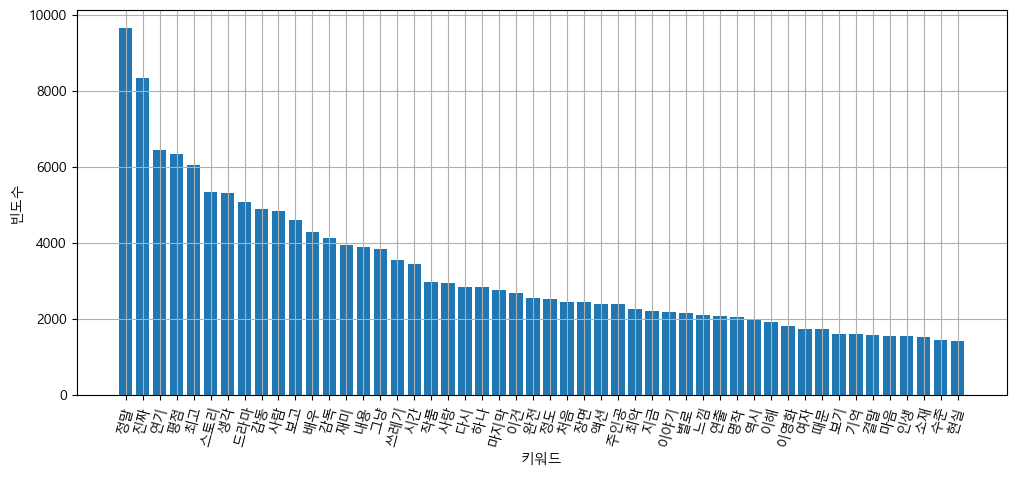

In [11]:
font_path = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family = font_name)

plt.figure(figsize=(12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_keys = sorted(word_count, key=word_count.get, reverse=True) # word_count하면 되네
sorted_values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_values, align='center')
plt.xticks(range(len(word_count)), list(sorted_keys), rotation=75)
plt.show()

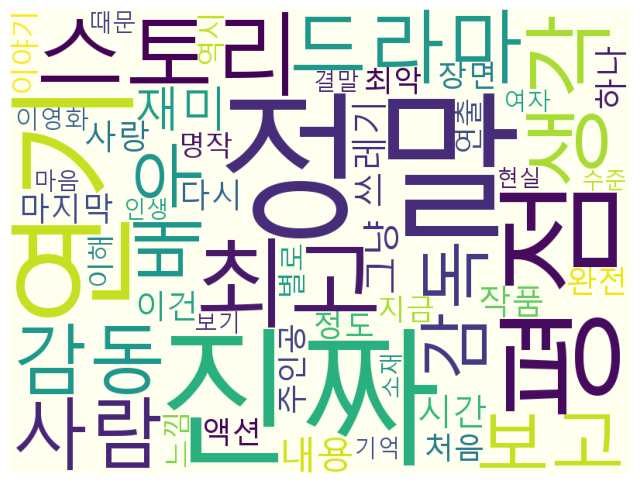

In [12]:
wc = WordCloud(font_path, background_color = 'ivory', width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

cloud.to_file(inputFileName + '_cloud.jpg') # 저장